In [2]:
# NOTES 
# add all chl values 
# make a gif of seasonal changes 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4 as nc
from matplotlib import animation
from IPython.display import HTML

In [4]:
import xarray as xr

In [5]:
directory = 'gcm_data/dec_1_2021'
file_name = 'chl.0000000000.nc'
f_path = directory + '/' + file_name
ds = nc.Dataset(directory + '/' + file_name)

In [6]:
# TRYING WITH XARRAY instead of netcdf4
dset = xr.open_dataset(f_path)
dset

<xarray.Dataset>
Dimensions:      (T: 11, X: 360, Y: 160, Zmd000023: 23)
Coordinates:
  * X            (X) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * Y            (Y) float64 -79.5 -78.5 -77.5 -76.5 ... 76.5 77.5 78.5 79.5
  * T            (T) datetime64[ns] 2000-01-31 2000-03-01 ... 2000-11-26
Dimensions without coordinates: Zmd000023
Data variables:
    diag_levels  (Zmd000023) float64 ...
    iter         (T) int32 ...
    TRAC71       (T, Zmd000023, Y, X) float32 ...
    TRAC72       (T, Zmd000023, Y, X) float32 ...
    TRAC73       (T, Zmd000023, Y, X) float32 ...
    TRAC74       (T, Zmd000023, Y, X) float32 ...
    TRAC75       (T, Zmd000023, Y, X) float32 ...
    TRAC76       (T, Zmd000023, Y, X) float32 ...
    TRAC77       (T, Zmd000023, Y, X) float32 ...
    TRAC78       (T, Zmd000023, Y, X) float32 ...
    TRAC79       (T, Zmd000023, Y, X) float32 ...
    TRAC80       (T, Zmd000023, Y, X) float32 ...
    TRAC81       (T, Zmd000023, Y, X) float32 ...
    TRAC82       (T, Zmd000023, Y, X) float32 ...
    TRAC83       (T, Zmd000023, Y, X) float32 ...
    TRAC84       (T, Zmd000023, Y, X) float32 ...
    TRAC85       (T, Zmd000023, Y, X) float32 ...
    TRAC86       (T, Zmd000023, Y, X) float32 ...
    TRAC87       (T, Zmd000023, Y, X) float32 ...
    TRAC88       (T, Zmd000023, Y, X) float32 ...
    TRAC89       (T, Zmd000023, Y, X) float32 ...
    TRAC90       (T, Zmd000023, Y, X) float32 ...
    TRAC91       (T, Zmd000023, Y, X) float32 ...
    TRAC92       (T, Zmd000023, Y, X) float32 ...
    TRAC93       (T, Zmd000023, Y, X) float32 ...
    TRAC94       (T, Zmd000023, Y, X) float32 ...
    TRAC95       (T, Zmd000023, Y, X) float32 ...
    TRAC96       (T, Zmd000023, Y, X) float32 ...
    TRAC97       (T, Zmd000023, Y, X) float32 ...
    TRAC98       (T, Zmd000023, Y, X) float32 ...
    TRAC99       (T, Zmd000023, Y, X) float32 ...
    TRAC0a       (T, Zmd000023, Y, X) float32 ...
    TRAC0b       (T, Zmd000023, Y, X) float32 ...
Attributes:
    MITgcm_version:  checkpoint68d
    build_user:      birdy
    build_host:      eofe7.cm.cluster
    build_date:      Thu Nov 18 13:27:44 EST 2021
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    MITgcm_mnc_ver:  0.9
    sNx:             30
    sNy:             20
    OLx:             4
    OLy:             4
    nSx:             1
    nSy:             1
    nPx:             12
    nPy:             8
    Nx:              360
    Ny:              160
    Nr:              23

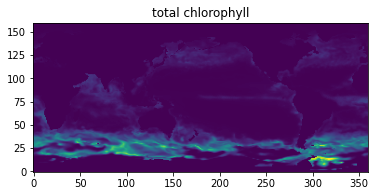

In [9]:
# ANIMATED PLOT chl (TOTAL) over 12 months

dset = xr.open_dataset(f_path)

chl_vars = list(dset.keys())
chl_vars.remove('diag_levels')
chl_vars.remove('iter')

t = 0
chl_total = dset[chl_vars[0]][t, 0, :, :]
for chl in chl_vars[1:]:
    chl2 = dset[chl][t, 0, :, :]
    chl_total = chl_total + chl2

fig, ax = plt.subplots()
im = plt.imshow(chl_total, animated=True, origin='lower')
plt.title("total chlorophyll")

# increase time with each iteration 
def animate(t):
    # add em all together 
    chl_total = dset[chl_vars[0]][t, 0, :, :]
    for chl in chl_vars[1:]:
        chl2 = dset[chl][t, 0, :, :]
        chl_total = chl_total + chl2
    im.set_array(chl_total)
    return [im]

anim = animation.FuncAnimation(fig, animate, frames=dset['T'].shape[0])
HTML(anim.to_jshtml()) # display interactive plot 

# save animation to gif
# writergif = animation.PillowWriter(fps=2)
# gif_name = "chl_total"
# anim.save(f'{gif_name}_one_year.gif', writer=writergif)